In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import joblib # Để lưu các model/preprocessor

In [38]:
# --- Đọc dữ liệu từ file Excel (hoặc CSV) ---
df = pd.read_csv("data\data_students.csv")  # Đổi tên nếu file khác
# --- 1. Khám phá dữ liệu cơ bản ---
print("Kích thước dữ liệu:", df.shape)
print(df.head())
print(df.info())
print(df.describe(include='all'))
df['final_result'].unique()

Kích thước dữ liệu: (31582, 8)
   id_student gender         region        entrance_result  \
0       11391      M    Addis Ababa       HE Qualification   
1       28400      F    Afar Region       HE Qualification   
2       30268      F  Amhara Region  A Level or Equivalent   
3       31604      F  Oromia Region  A Level or Equivalent   
4       32885      F   South Region     Lower Than A Level   

   num_of_prev_attempts  studied_credits disability final_result  
0                   0.0            240.0          N         Pass  
1                   0.0             60.0          N         Pass  
2                   0.0             60.0          Y    Withdrawn  
3                   0.0             60.0          N         Pass  
4                   0.0             60.0          N         Pass  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31582 entries, 0 to 31581
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_14132\3453756072.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("data\data_students.csv")  # Đổi tên nếu file khác


array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [39]:
# --- 2. Kiểm tra dữ liệu thiếu (Missing values) ---
print("Số lượng giá trị thiếu:")
print(df.isnull().sum())

Số lượng giá trị thiếu:
id_student              0
gender                  0
region                  0
entrance_result         0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


In [40]:
# --- 3. Kiểm tra dữ liệu trùng ---
print("\nSố dòng trùng:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Số dòng trùng: 0


In [41]:
# --- 4. Chuẩn hoá dữ liệu phân loại (loại bỏ khoảng trắng, viết hoa đồng nhất) ---
cat_cols = ['gender', 'region', 'entrance_result', 'disability', 'final_result']
for col in cat_cols:
    df[col] = df[col].astype(str).str.upper().str.strip()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14132\3306537937.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['studied_credits'].fillna(df['studied_credits'].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14132\3306537937.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

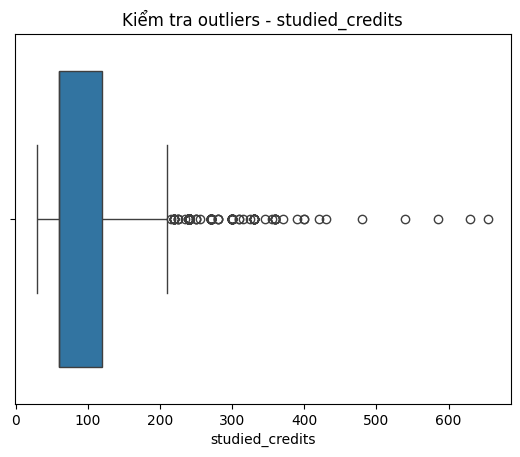


✅ Tiền xử lý hoàn tất! Dữ liệu đã lưu vào 'cleaned_students_data.csv'


In [42]:
# --- 5. Chuyển kiểu dữ liệu phù hợp ---
df['studied_credits'] = pd.to_numeric(df['studied_credits'], errors='coerce')
df['num_of_prev_attempts'] = pd.to_numeric(df['num_of_prev_attempts'], errors='coerce')

# --- 6. Xử lý giá trị thiếu ---
# Với số: thay bằng trung bình
df['studied_credits'].fillna(df['studied_credits'].mean(), inplace=True)
df['num_of_prev_attempts'].fillna(df['num_of_prev_attempts'].mean(), inplace=True)

# Với chuỗi: thay bằng "UNKNOWN" nếu cần (ở đây tạm bỏ qua vì đã ép kiểu string ở bước 4)

# --- 7. Kiểm tra outliers bằng boxplot ---
sns.boxplot(x=df['studied_credits'])
plt.title("Kiểm tra outliers - studied_credits")
plt.show()

# --- 8. Mã hoá các biến phân loại bằng LabelEncoder ---
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Lưu encoder để giải mã ngược khi cần

# --- 9. Chuẩn hoá dữ liệu số bằng StandardScaler ---
scaler = StandardScaler()
num_cols = ['studied_credits', 'num_of_prev_attempts']
df[num_cols] = scaler.fit_transform(df[num_cols])

# --- 10. Tách dữ liệu train/test (nếu bạn dùng học máy) ---
# Xác định X và y
X = df.drop(columns=['id_student', 'final_result'])  # X không chứa id hay label
y = df['final_result'].values.reshape(-1,1)  # y là biến mục tiêu
# --- 11. Lưu dữ liệu đã xử lý & các đối tượng dùng lại ---
df.to_csv("cleaned_students_data.csv", index=False)
joblib.dump(encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\n✅ Tiền xử lý hoàn tất! Dữ liệu đã lưu vào 'cleaned_students_data.csv'")


In [43]:
print(df['final_result'].value_counts(normalize=True))
print(df['final_result'].value_counts())


final_result
2    0.380407
3    0.308372
1    0.218542
0    0.092679
Name: proportion, dtype: float64
final_result
2    12014
3     9739
1     6902
0     2927
Name: count, dtype: int64


# Huấn luyện mô hình cây DT

In [44]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Khởi tạo mô hình
model = DecisionTreeClassifier()
# Huấn luyện
model.fit(X_train, y_train)
print(model)

DecisionTreeClassifier()


In [45]:
# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy: 0.39939844863067914
              precision    recall  f1-score   support

           0       0.09      0.02      0.03       571
           1       0.32      0.15      0.20      1383
           2       0.42      0.69      0.52      2395
           3       0.41      0.34      0.37      1968

    accuracy                           0.40      6317
   macro avg       0.31      0.30      0.28      6317
weighted avg       0.36      0.40      0.36      6317

[[   9   36  424  102]
 [  24  204  796  359]
 [  37  224 1648  486]
 [  32  182 1092  662]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
params = {
    'max_depth': [7],
    'min_samples_split': [2],
}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_


y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Best params: {'max_depth': 7, 'min_samples_split': 2}
Accuracy: 0.41095456704131705
              precision    recall  f1-score   support

           0       0.20      0.00      0.00       571
           1       0.34      0.09      0.15      1383
           2       0.41      0.79      0.54      2395
           3       0.45      0.29      0.35      1968

    accuracy                           0.41      6317
   macro avg       0.35      0.29      0.26      6317
weighted avg       0.39      0.41      0.35      6317

